In [8]:
import tfsites_2025_07_30 as tf

import _fxns as fx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Running TF Sites

In [14]:
enhancer_dna_alignment_table_list=[
'4-zrs-polydactyly/compare-seqs-inputs/407/enhancer.tsv',
'4-zrs-polydactyly/compare-seqs-inputs/446/enhancer.tsv',
'4-zrs-polydactyly/compare-seqs-inputs/555/enhancer.tsv'
]

for enhancer_dna_alignment_table in enhancer_dna_alignment_table_list:
    
    enhancer_functional_group_table='4-zrs-polydactyly/compare-seqs-inputs/groups.tsv'
    tf_affinity_information='4-zrs-polydactyly/compare-seqs-inputs/pbm-data.tsv'

    tfdf=pd.read_csv(tf_affinity_information,sep='\t')

    print('\n\n########################################################################')
    print('########################################################################')
    print('Analyzing',enhancer_dna_alignment_table)
    print('as pbm')
    
    # pbm
    tf.compare_seqs_wrapper(
        enhancer_dna_alignment_table,
        enhancer_functional_group_table,
        tf_affinity_information=tfdf,
        pwm_input=None,
        isAlreadyPwm=False,
        isFraction=False,
        pseudocounts=False,
        minimum_binding_change=0.1,
        minimum_pwm_score=0.8,
        hypothesis='gof',
        betaPwm=False,
        output_name='zrs-polydactyly',
        outdir='4-zrs-polydactyly/compare-seqs-outputs-pbm/',
        pwm_file_format='jaspar')

    print('\n\n#####################################')
    print('as pwm')
    # pwm
    tf.compare_seqs_wrapper(
        enhancer_dna_alignment_table,
        enhancer_functional_group_table,
        tf_affinity_information=None,
        pwm_input='0-define-tf-sites/PWMs-E9.5-Forelimb-Jaspar-Anterior.txt',
        isAlreadyPwm=False,
        isFraction=False,
        pseudocounts=False,
        minimum_binding_change=0.1,
        minimum_pwm_score=0.8,
        hypothesis='gof',
        betaPwm=False,
        output_name='zrs-polydactyly',
        outdir='4-zrs-polydactyly/compare-seqs-outputs-pbm/',
        pwm_file_format='jaspar')



########################################################################
########################################################################
Analyzing 4-zrs-polydactyly/compare-seqs-inputs/407/enhancer.tsv
as pbm
trimming alignments...
Scanning sites for cores...
Scanning sites for pwms...
[WARNING] No hits found! Exiting.


#####################################
as pwm
trimming alignments...
Scanning sites for cores...
Scanning sites for pwms...
0%, 29%, 58%, 87%, map sites across enhancers...
prioritize gof and lof...
done!
[HTML] 45 hits for dnv are detected... starting now...
loading pwm and affinity reference files... and plotting site id scores...
extracting pfms...
visualize scores for site ids...
generate kmer images...
0.0%, 4.44%, 8.89%, 13.33%, 17.78%, 22.22%, 26.67%, 31.11%, 35.56%, 40.0%, 44.44%, 48.89%, 53.33%, 57.78%, 62.22%, 66.67%, 71.11%, 75.56%, 80.0%, 84.44%, 88.89%, 93.33%, 97.78%, generate html...
[HTML] 3 hits for inc are detected... starting now...
loading

# Which homeobox tfs are expressed in the anterior limb at E9.5

In [2]:
scdf=pd.read_csv('4-zrs-polydactyly/from-maggiev2_Homeobox expression in E9.5 anterior.tsv',sep='\t')
scdf.head()

,Unnamed: 0,Fraction,Skewness,Mean,Median,Label
0,Alx4,1.000000,1.606918,0.519089,0.429092,"['Test', 'Positive']"
1,Prrx2,0.960846,-0.595372,1.342604,1.402470,['Test']
2,Prrx1,0.957713,-0.954482,1.529238,1.613427,['Test']
3,Msx1,0.943618,-0.636994,1.474156,1.570921,['Test']
4,Lhx9,0.887236,-0.590019,1.268350,1.392476,['Test']


In [3]:
x=['Dlx1','Dlx2','Dlx3','Dlx4','Dlx5','Msx1','Msx2','Msx3','Lhx1','Lhx2','Lhx3','Lhx4','Lhx5','Lhx6','Lhx7','Lhx8','Lhx9','Prrx1','Prrx2','Alx3','Alx4']
scdf['is-homeobox']=scdf.iloc[:,0].apply(lambda s: s in x)
scdf.head()

,Unnamed: 0,Fraction,Skewness,Mean,Median,Label,is-homeobox
0,Alx4,1.000000,1.606918,0.519089,0.429092,"['Test', 'Positive']",True
1,Prrx2,0.960846,-0.595372,1.342604,1.402470,['Test'],True
2,Prrx1,0.957713,-0.954482,1.529238,1.613427,['Test'],True
3,Msx1,0.943618,-0.636994,1.474156,1.570921,['Test'],True
4,Lhx9,0.887236,-0.590019,1.268350,1.392476,['Test'],True


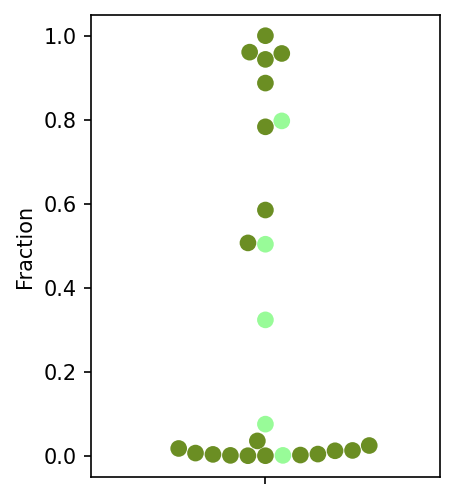

In [4]:
fig,ax=fx.quickfig(3,4)

sns.swarmplot(data=scdf,y='Fraction',hue='is-homeobox',palette=['palegreen','olivedrab'],s=8)
ax.get_legend().remove()
fig.savefig(f'4-zrs-polydactyly/tf-scrna.svg')


In [5]:
# label=Test     => the TF is a homeodomain tf that binds the AATT motif
# label=Positive => the TF is known to be in the anterior limb by in situ
# label=Negative => the TF is known to be ABSENT in the anterior limb by in situ
scdf.sort_values('Fraction')

,Unnamed: 0,Fraction,Skewness,Mean,Median,Label,is-homeobox
24,Lhx4,0.000000,NaN,0.000000,0.000000,['Test'],True
23,Msx3,0.000000,NaN,0.000000,0.000000,['Test'],True
22,Shh,0.000783,35.693154,0.000426,0.000000,['Negative'],False
21,Lhx3,0.000783,35.693148,0.000310,0.000000,['Test'],True
20,Lhx5,0.001566,26.078157,0.000540,0.000000,['Test'],True
19,Lhx6,0.003132,18.047753,0.000970,0.000000,['Test'],True
18,Lhx8,0.003915,20.520301,0.001904,0.000000,['Test'],True
17,Dlx4,0.006265,14.377168,0.002639,0.000000,['Test'],True
16,Dlx1,0.011746,13.306809,0.006361,0.000000,['Test'],True
15,Dlx3,0.012529,11.609912,0.006138,0.000000,['Test'],True


# Plot effects of GOF homeodomain polydactyly variants

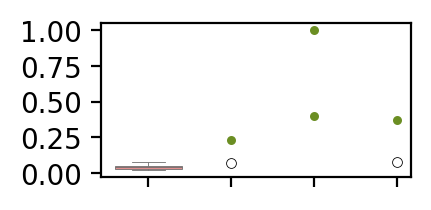

In [6]:
# percentile of 8mers for different homeoboxes

kmers=[
    ('407','GTATTTTA','GTAATTTA'),
    ('446','CTAATTTG','CTAATTAG'),
    ('555','CTGATGAT','CTAATGAT'),
]

s=5

tfname,core,pbm,kdf_fn =  ('lhx','NYAATNRN','0-define-tf-sites/LHX_table.tsv','0-define-tf-sites/out-tables/01b-8mer-stripplots-LHX2-pbm.csv')

kdf=pd.read_csv(kdf_fn)
kmersWithoutCore=kdf.loc[kdf['core-present']=='Ablation','8mer'].tolist()

seq2aff=tf.loadNormalizedFile(pbm)
allbindingsite=fx.IupacToAllPossibleSequences(core)
allaffs=[seq2aff[seq] for seq in allbindingsite]

fig,ax=fx.quickfig(2,1,dpi=200)

bp=sns.boxplot([seq2aff[seq] for seq in kmersWithoutCore],color='lightcoral',fliersize=0,linewidth=.3)

xi=0
for pos,ref,alt in kmers:

    xi+=1
    
    refaff=round(seq2aff[ref],2)
    altaff=round(seq2aff[alt],2)

    if ref!='CTAATTTG':
        ax.scatter(xi,refaff,color='black',s=s+3)
        ax.scatter(xi,refaff,color='white',s=s)
    ax.scatter(xi,altaff,color='olivedrab',s=s)
    

    refpct=round(stats.percentileofscore(allaffs, refaff, kind='rank'))
    altpct=round(stats.percentileofscore(allaffs, altaff, kind='rank'))

ax.scatter(2,0.4,color='olivedrab',s=s)

ax.set_xticks(range(len(kmers)+1))
ax.set_yticks([0,.25,.5,.75,1])

fig.savefig(f'4-zrs-polydactyly/{tfname}-variant-affs.svg')
    

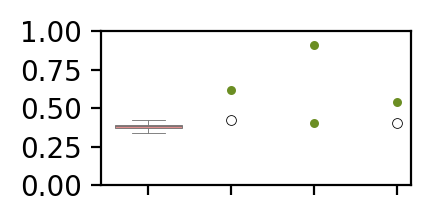

In [7]:
# percentile of 8mers for different homeoboxes

kmers=[
    ('407','GTATTTTA','GTAATTTA'),
    ('446','CTAATTTG','CTAATTAG'),
    ('555','CTGATGAT','CTAATGAT'),
]

s=5

tfname,core,pbm,kdf_fn =  ('msx','NYAATNRN','0-define-tf-sites/MSX_table.tsv','0-define-tf-sites/out-tables/01b-8mer-stripplots-MSX1-pbm.csv')

kdf=pd.read_csv(kdf_fn)
kmersWithoutCore=kdf.loc[kdf['core-present']=='Ablation','8mer'].tolist()

seq2aff=tf.loadNormalizedFile(pbm)
allbindingsite=fx.IupacToAllPossibleSequences(core)
allaffs=[seq2aff[seq] for seq in allbindingsite]

fig,ax=fx.quickfig(2,1,dpi=200)

bp=sns.boxplot([seq2aff[seq] for seq in kmersWithoutCore],color='lightcoral',fliersize=0,linewidth=.3)

xi=0
for pos,ref,alt in kmers:

    xi+=1
    
    refaff=round(seq2aff[ref],2)
    altaff=round(seq2aff[alt],2)

    if ref!='CTAATTTG':
        ax.scatter(xi,refaff,color='black',s=s+3)
        ax.scatter(xi,refaff,color='white',s=s)
    ax.scatter(xi,altaff,color='olivedrab',s=s)
    

    refpct=round(stats.percentileofscore(allaffs, refaff, kind='rank'))
    altpct=round(stats.percentileofscore(allaffs, altaff, kind='rank'))

ax.scatter(2,0.4,color='olivedrab',s=s)

ax.set_xticks(range(len(kmers)+1))
ax.set_yticks([0,.25,.5,.75,1])

fig.savefig(f'4-zrs-polydactyly/{tfname}-variant-affs.svg')
    